In [190]:
#import library to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
warnings.filterwarnings('ignore')
%matplotlib inline

In [191]:
# import the data into variable 'data'
data = pd.read_csv("risk_factors_cervical_cancer.csv")
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [192]:
#from google.colab import drive
#drive.mount('/content/drive')

# Cleaning data

In [193]:
#try to check the null but cannot be identified becuase null value reperesented in '?'
data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [194]:
# Turn "?" symbol into NaN to make it readable for python
missing_value = ["?", np.nan]
data = pd.read_csv("risk_factors_cervical_cancer.csv", na_values=missing_value)

data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [195]:
#check if the data has duplicated row
data.duplicated().sum()

23

In [196]:
#drop the duplicated row
data.drop_duplicates(inplace=True)

In [197]:
#merged four target variables into one
column_names = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
data['Diagnosed']= data[column_names].sum(axis=1)
#drop the merged columns
col = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
data = data.drop(columns=col)

In [198]:
#fill the null value with data's mean
datamean = data.fillna(data.mean())
#round the float value into 2 decimal values
datamean = datamean.round(decimals = 2)
datamean

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Diagnosed
0,18,4.0,15.00,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
1,15,1.0,14.00,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
2,34,1.0,17.02,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
3,52,5.0,16.00,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0,6.14,5.82,1,0,1,0,0
4,46,3.0,21.00,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
854,32,2.0,19.00,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
855,25,2.0,17.00,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,1
856,33,2.0,24.00,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0


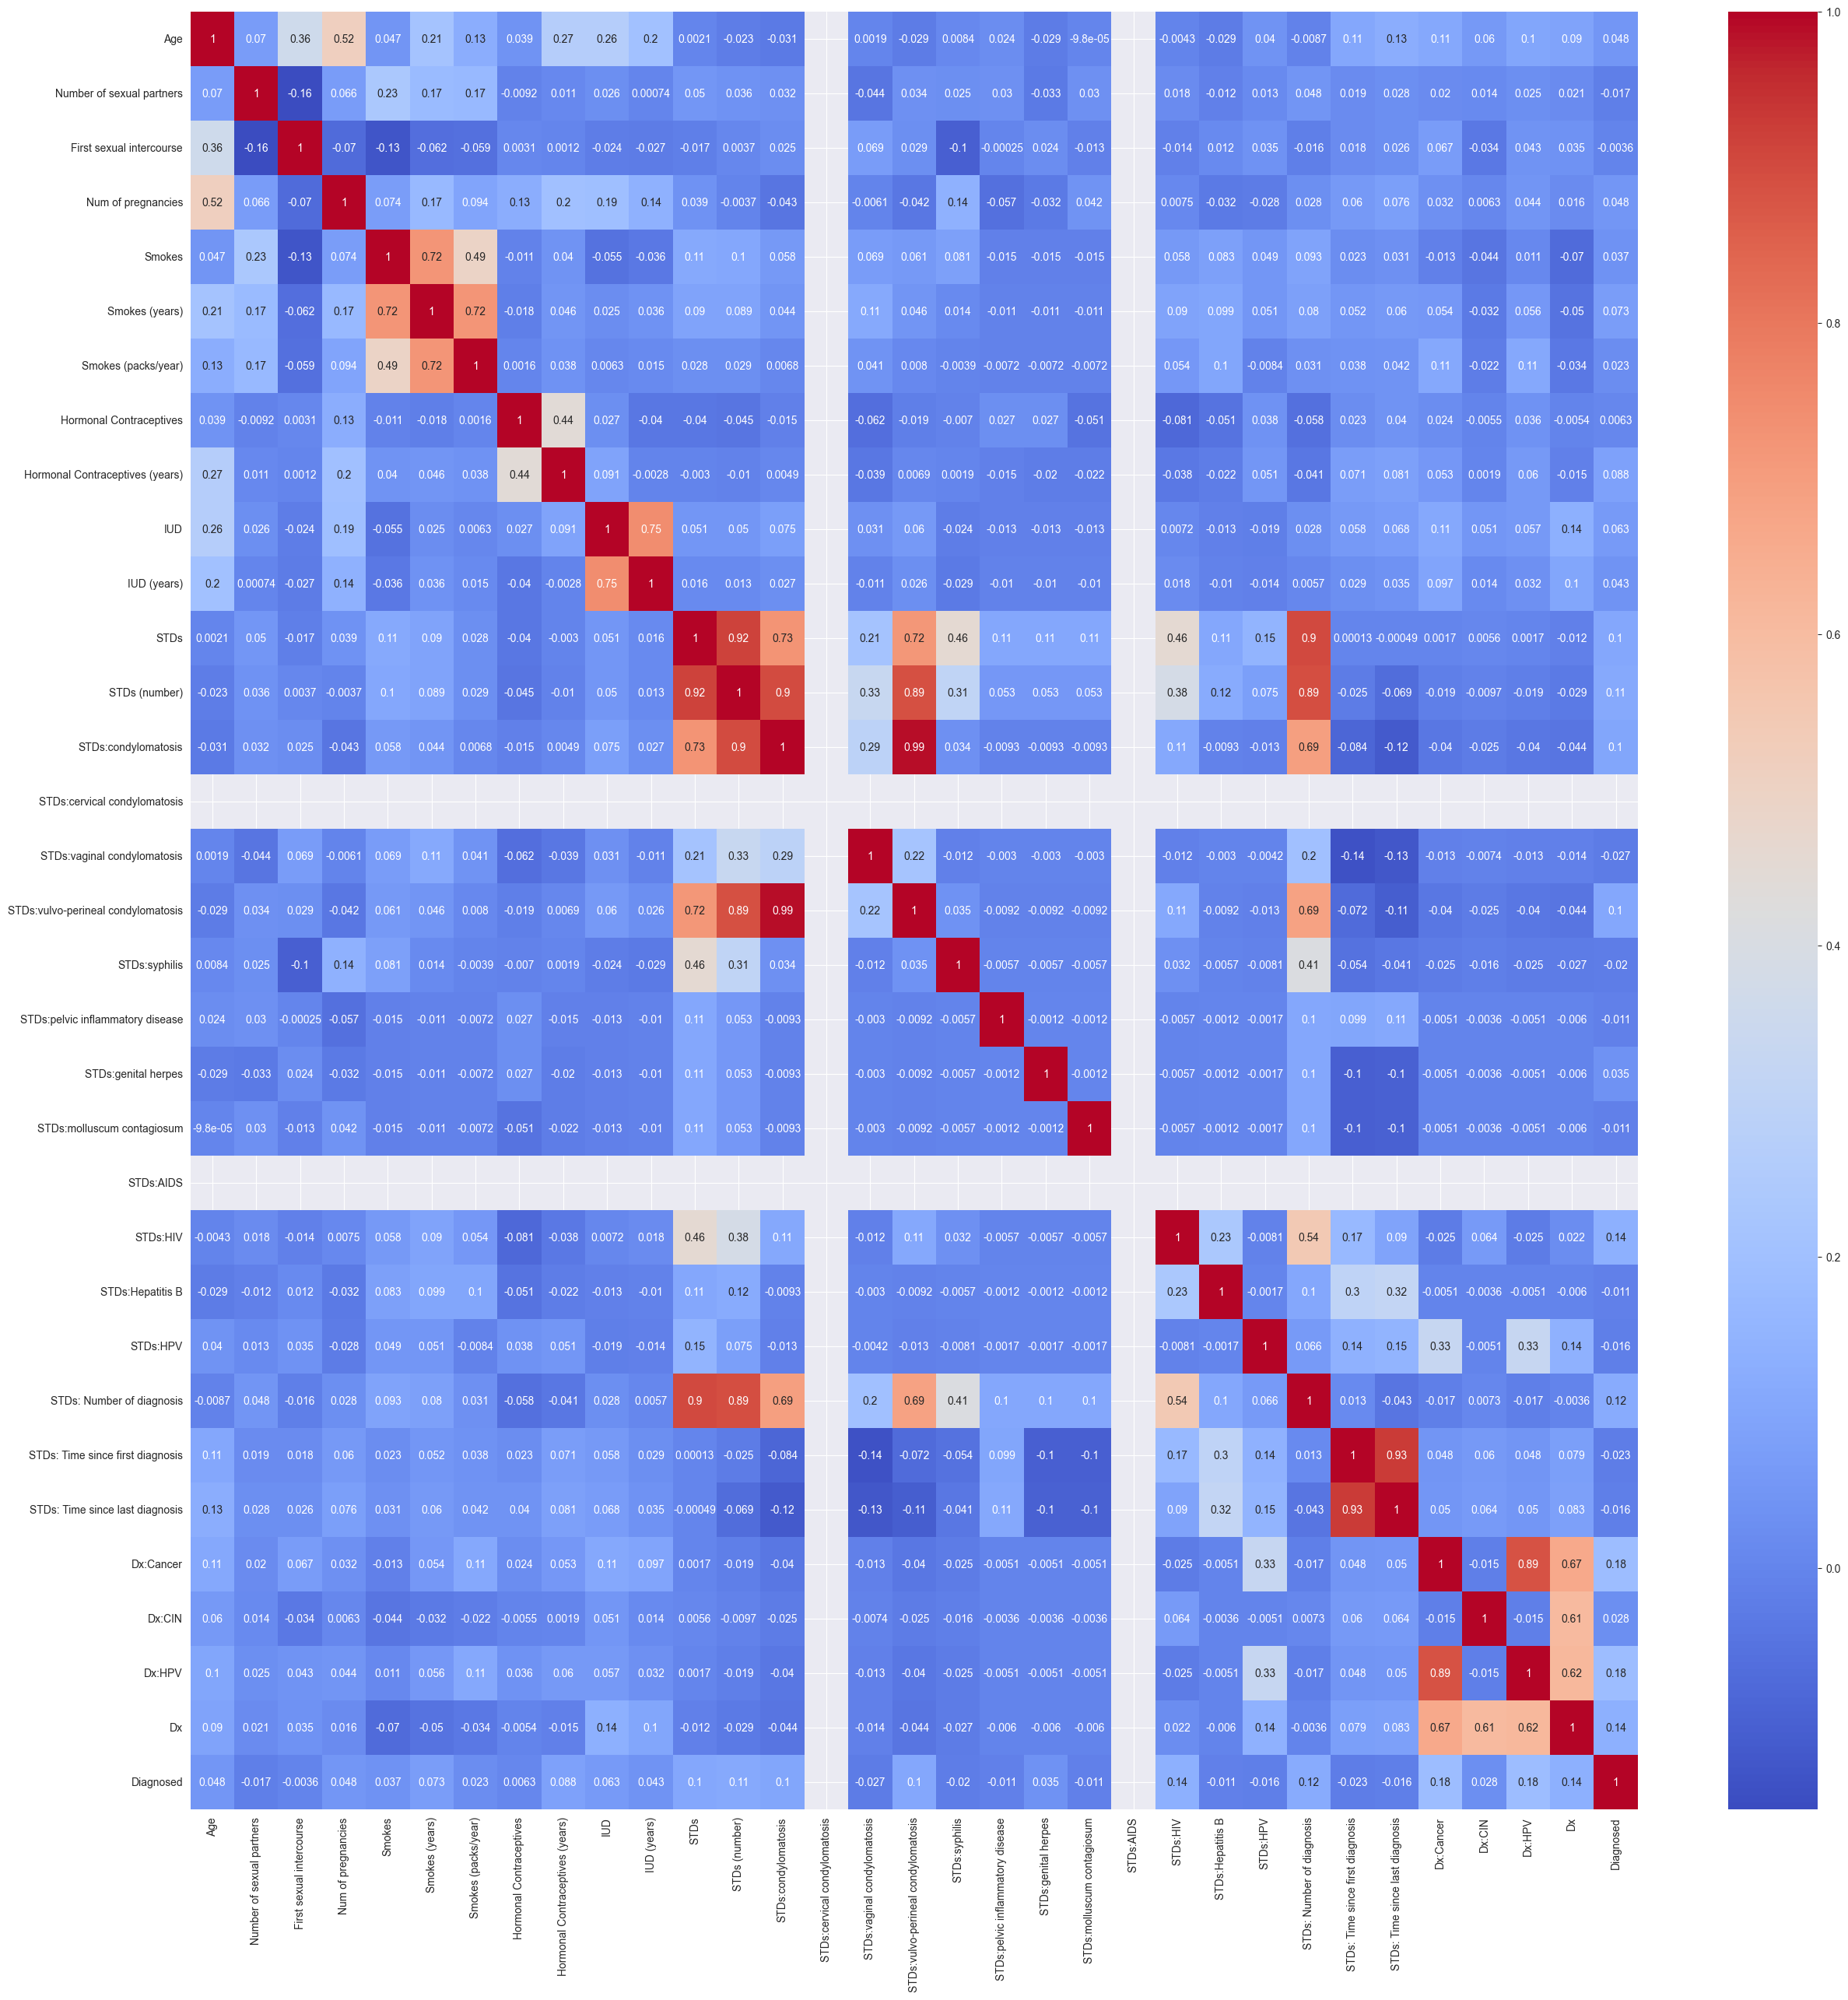

In [199]:
plt.figure(figsize = (30, 30))
sns.heatmap(datamean.corr(), annot = True, cmap="coolwarm")
plt.show()

In [200]:
datamean

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Diagnosed
0,18,4.0,15.00,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
1,15,1.0,14.00,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
2,34,1.0,17.02,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
3,52,5.0,16.00,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0,6.14,5.82,1,0,1,0,0
4,46,3.0,21.00,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
854,32,2.0,19.00,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
855,25,2.0,17.00,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,1
856,33,2.0,24.00,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0


In [201]:
import pandas as pd

# Assuming you have a DataFrame named df with input features and target value
target_column = 'Diagnosed'  # Specify the name of the target column
correlation_threshold = 0.05  # Specify the correlation threshold
print(datamean.corr()[target_column])
# Calculate the correlation between the target and input features, excluding the target column
correlation = datamean.corr()[target_column]

# Identify the columns with correlation great than the threshold and not equal to 1
columns_to_drop = correlation[(correlation.abs() < correlation_threshold) & (correlation != 1)].index

# Drop the identified columns from the DataFrame
datamean = datamean.drop(columns_to_drop, axis=1)

print(datamean.head)

Age                                   0.048219
Number of sexual partners            -0.017029
First sexual intercourse             -0.003563
Num of pregnancies                    0.048189
Smokes                                0.036701
Smokes (years)                        0.072696
Smokes (packs/year)                   0.022832
Hormonal Contraceptives               0.006331
Hormonal Contraceptives (years)       0.088422
IUD                                   0.062851
IUD (years)                           0.042574
STDs                                  0.102782
STDs (number)                         0.111776
STDs:condylomatosis                   0.101809
STDs:cervical condylomatosis               NaN
STDs:vaginal condylomatosis          -0.027208
STDs:vulvo-perineal condylomatosis    0.104705
STDs:syphilis                        -0.019860
STDs:pelvic inflammatory disease     -0.011421
STDs:genital herpes                   0.035098
STDs:molluscum contagiosum           -0.011421
STDs:AIDS    

In [202]:
datamean.shape

(835, 15)

In [203]:
datamean.isnull().sum()

Smokes (years)                        0
Hormonal Contraceptives (years)       0
IUD                                   0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vulvo-perineal condylomatosis    0
STDs:AIDS                             0
STDs:HIV                              0
STDs: Number of diagnosis             0
Dx:Cancer                             0
Dx:HPV                                0
Dx                                    0
Diagnosed                             0
dtype: int64

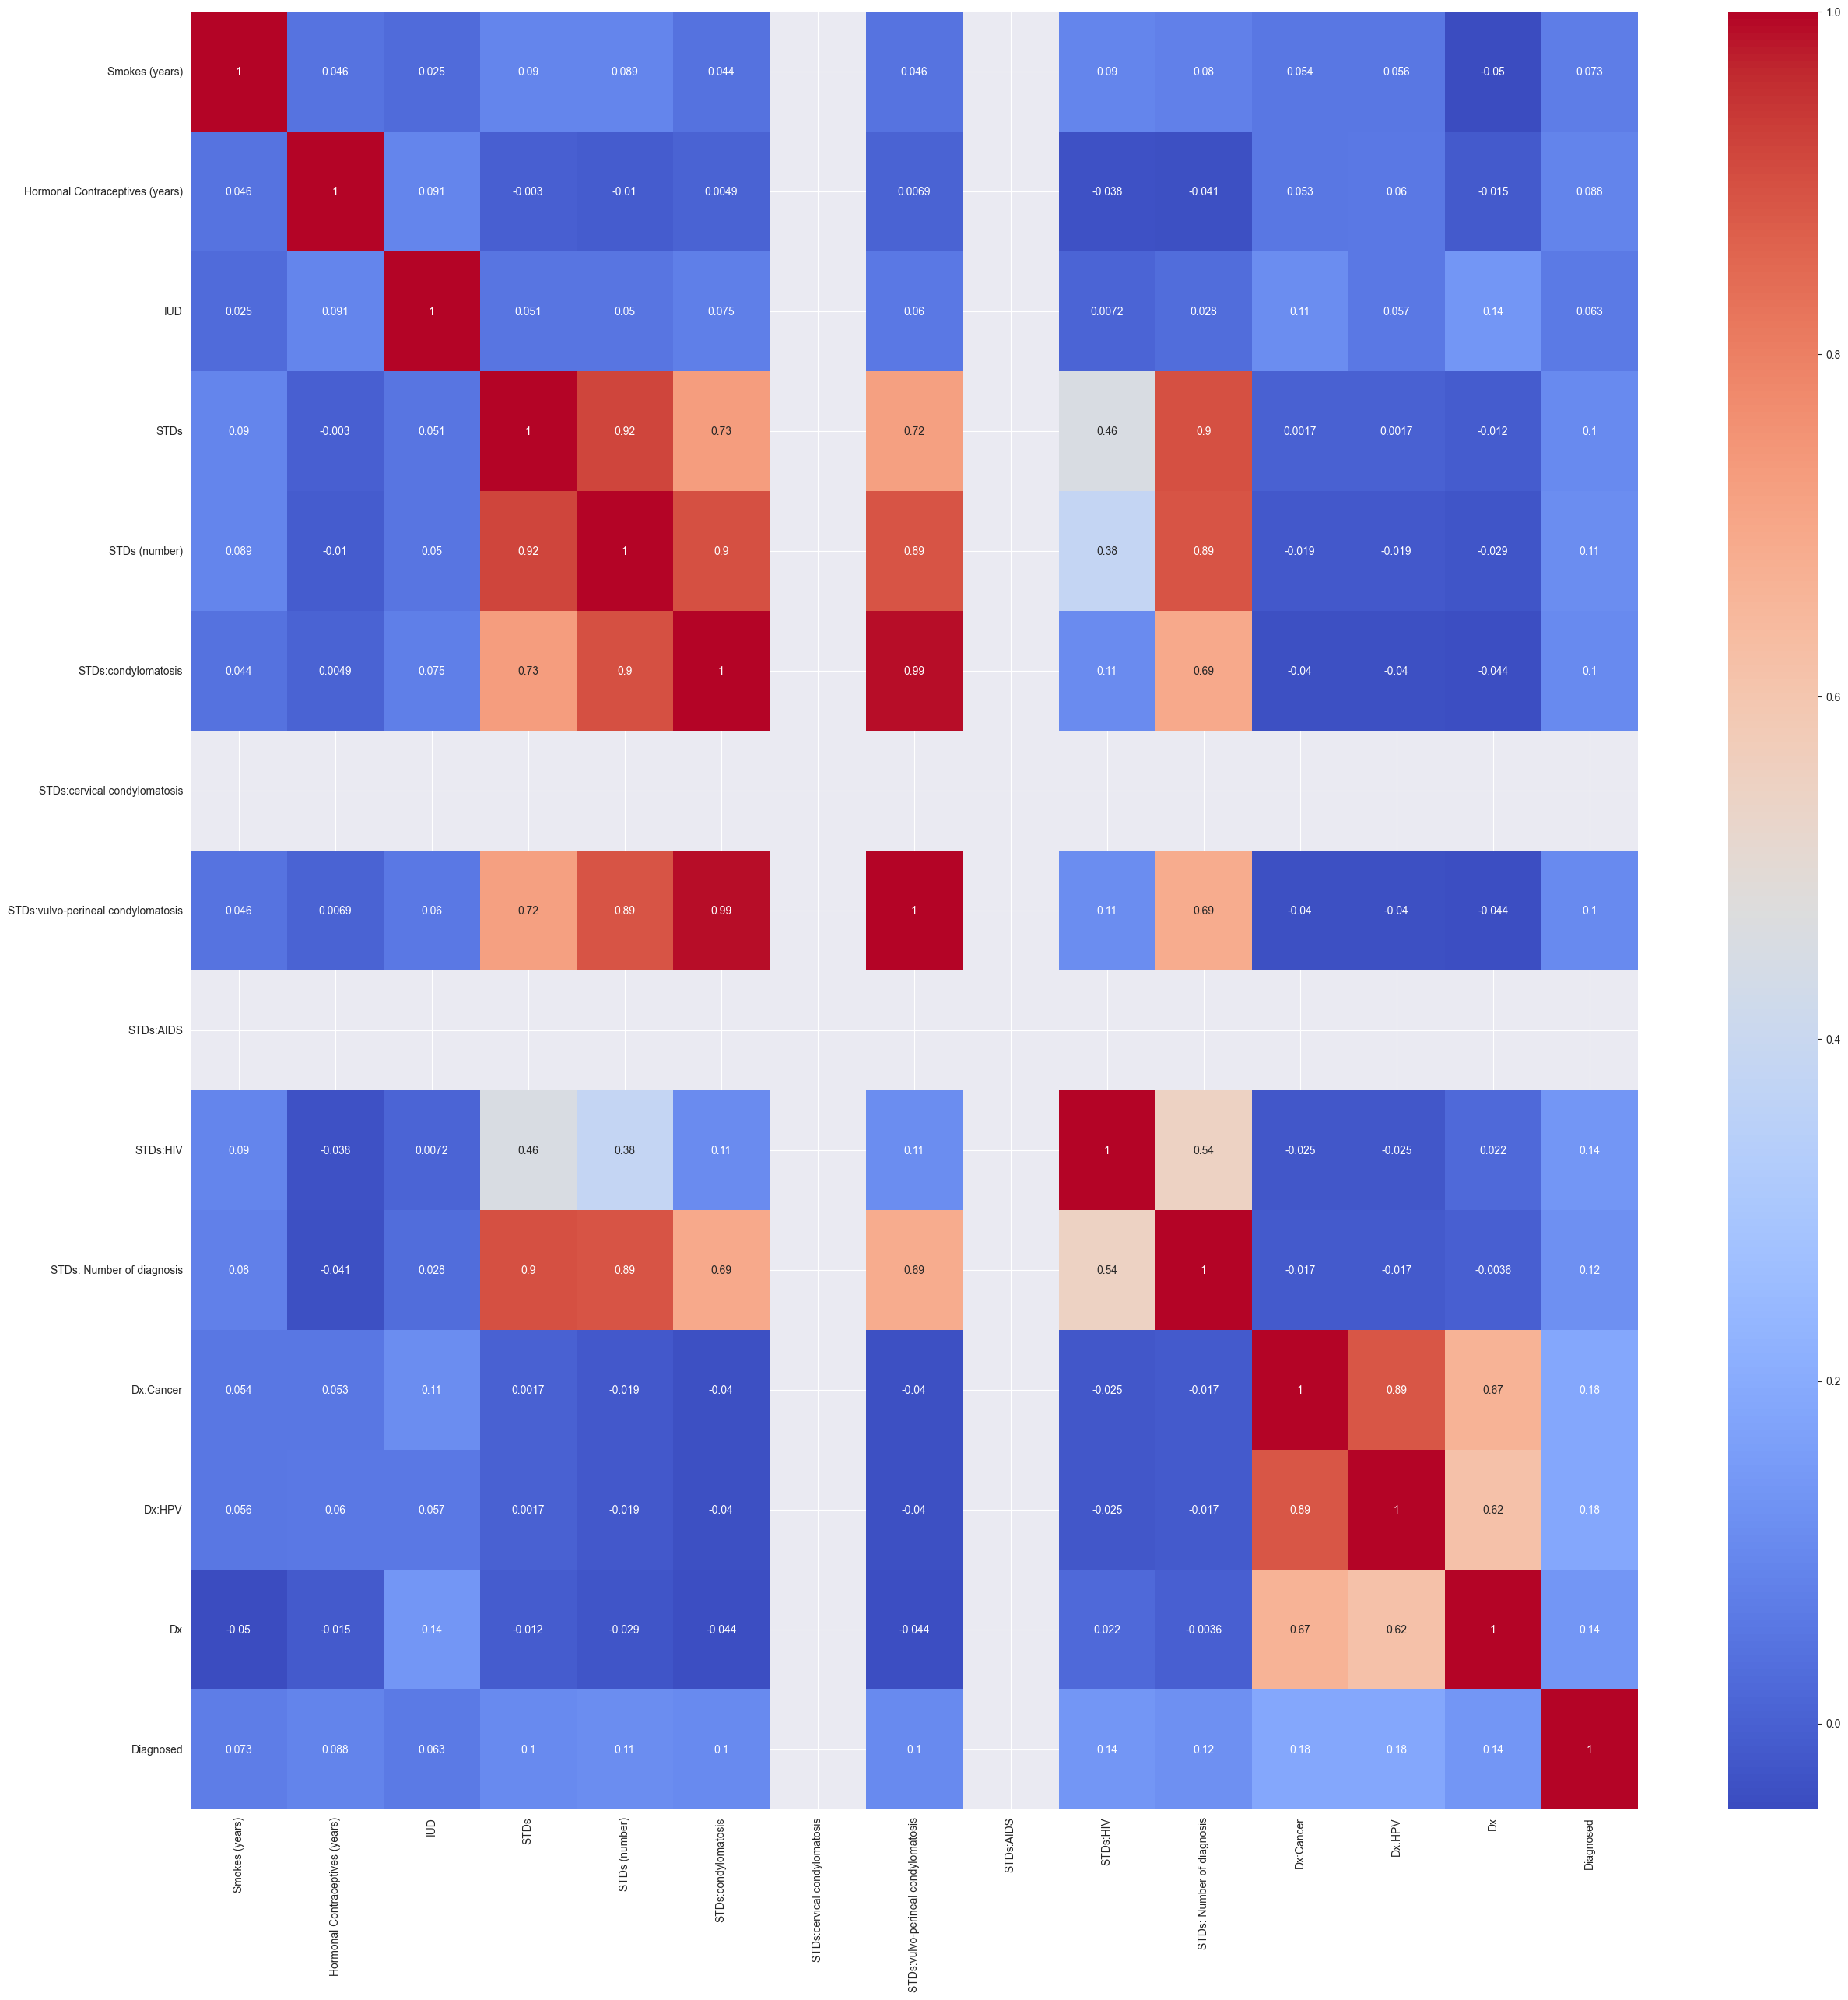

In [204]:
plt.figure(figsize = (30, 30))
sns.heatmap(datamean.corr(), annot = True, cmap="coolwarm")
plt.show()

In [205]:
#based on the heatmap
#drop the unecessary columns
col = ['STDs:AIDS','STDs:cervical condylomatosis','STDs:condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:HIV']
datamean.drop(columns=col, inplace=True)
datamean.shape
datamean

,Smokes (years),Hormonal Contraceptives (years),IUD,STDs,STDs (number),STDs: Number of diagnosis,Dx:Cancer,Dx:HPV,Dx,Diagnosed
0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0
1,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0
2,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0
3,37.0,3.00,0.0,0.0,0.0,0,1,1,0,0
4,0.0,15.00,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
853,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0
854,0.0,8.00,0.0,0.0,0.0,0,0,0,0,0
855,0.0,0.08,0.0,0.0,0.0,0,0,0,0,1
856,0.0,0.08,0.0,0.0,0.0,0,0,0,0,0


In [206]:
#DATA ANALYSIS
from sklearn.preprocessing import MinMaxScaler

y_variable=['Cervix Cancer'] #Create columns for y variables
#Create columns for non-boolean x variables
X_col_new = ['Smokes (years)','Hormonal Contraceptives (years)','STDs (number)','STDs: Number of diagnosis'] 
x_var = datamean[X_col_new] #Create new dataset for non-boolean x variables
scaler = MinMaxScaler()
x_var = scaler.fit_transform(x_var)
x_var

,Smokes (years),Hormonal Contraceptives (years),STDs (number),STDs: Number of diagnosis
0,0.0,0.00,0.0,0
1,0.0,0.00,0.0,0
2,0.0,0.00,0.0,0
3,37.0,3.00,0.0,0
4,0.0,15.00,0.0,0
...,...,...,...,...
853,0.0,0.00,0.0,0
854,0.0,8.00,0.0,0
855,0.0,0.08,0.0,0
856,0.0,0.08,0.0,0


In [207]:
#Method to look for outliers using z-score

def detect_outliers_zscore(x_data, threshold):
    """
    Detect outliers in the given x-variables using z-scores.   
    Args:
        x_data (array-like): The input x-variables data.
        threshold (float): The z-score threshold for determining outliers.
        Data points with z-scores greater than the threshold are considered outliers.
    Returns:
        array: Boolean array indicating whether each x-data point is an outlier (True) or not (False).
    """
    x_mean = np.mean(x_data, axis=0)
    x_std = np.std(x_data, axis=0)
    z_scores = np.abs((x_data - x_mean) / x_std)
    outliers = z_scores > threshold
    return outliers

In [208]:
outliers = detect_outliers_zscore(x_var, threshold=3) #Look for outliers in x_var (threshold value can be modified)
outliers

,Smokes (years),Hormonal Contraceptives (years),STDs (number),STDs: Number of diagnosis
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,True,False,False,False
4,False,True,False,False
...,...,...,...,...
853,False,False,False,False
854,False,False,False,False
855,False,False,False,False
856,False,False,False,False


In [209]:
clean_data = datamean.copy()
clean_data[X_col_new] = x_var
clean_data = clean_data[~outliers.any(axis=1)] #Remove rows containing outliers in datamean
clean_data

,Smokes (years),Hormonal Contraceptives (years),IUD,STDs,STDs (number),STDs: Number of diagnosis,Dx:Cancer,Dx:HPV,Dx,Diagnosed
0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0
1,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0
2,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0
5,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0
7,0.0,2.00,1.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
853,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0
854,0.0,8.00,0.0,0.0,0.0,0,0,0,0,0
855,0.0,0.08,0.0,0.0,0.0,0,0,0,0,1
856,0.0,0.08,0.0,0.0,0.0,0,0,0,0,0


Linear Regression model by Azim

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = clean_data.drop(columns = 'Diagnosed')
y = clean_data['Diagnosed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

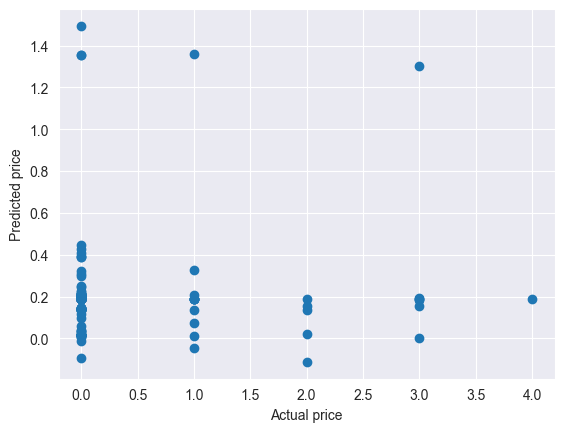

In [211]:
import matplotlib.pyplot as plt

y_pred_test = lr.predict(x_test)

plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

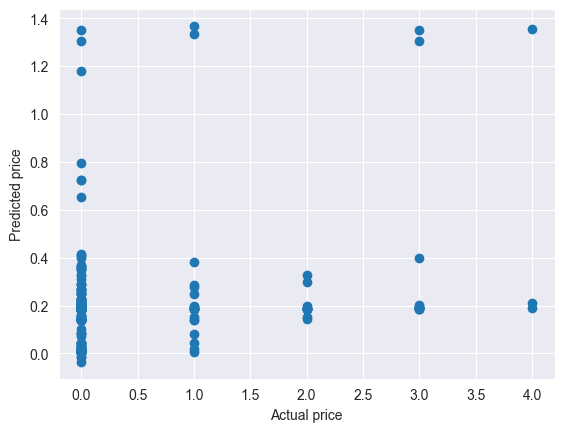

In [212]:
y_pred_train = lr.predict(x_train)

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

In [213]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test, y_pred_test)
r2score

-0.04476033235523924

In [214]:
r2score = r2_score(y_train, y_pred_train)
r2score

0.06701963458461935

In [215]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_test)

0.4744064774470219

In [216]:
mean_squared_error(y_train, y_pred_train)

0.392497927394988

# Decision Tree

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [218]:
# Split the data into input features (X) and the target variable (y)
X = clean_data.drop('Diagnosed', axis=1)
y = clean_data['Diagnosed']

In [219]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [220]:
# Model Selection: Decision Tree
decision_tree = DecisionTreeClassifier()

In [221]:
# Model Training
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [222]:
# Model Evaluation
y_pred_dt = decision_tree.predict(X_test)
print('Decision Tree Evaluation Results:')
print(classification_report(y_test, y_pred_dt))

Decision Tree Evaluation Results:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       124
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         3
           3       0.50      0.14      0.22         7
           4       0.00      0.00      0.00         1

    accuracy                           0.81       150
   macro avg       0.27      0.22      0.22       150
weighted avg       0.71      0.81      0.75       150



In [223]:
# Hyperparameter Tuning for Decision Tree
param_grid = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

In [224]:
# Model Evaluation with Tuned Parameters
y_pred_best_dt = best_dt.predict(X_test)
print('Decision Tree (Tuned) Evaluation Results:')
print(classification_report(y_test, y_pred_best_dt))

Decision Tree (Tuned) Evaluation Results:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       124
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.83       150
   macro avg       0.17      0.20      0.18       150
weighted avg       0.68      0.83      0.75       150



# Random Forest

In [225]:
# Model Selection: Random Forest
random_forest = RandomForestClassifier()

In [226]:
# Model Training
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [227]:
# Model Evaluation
y_pred_rf = random_forest.predict(X_test)
print('Random Forest Evaluation Results:')
print(classification_report(y_test, y_pred_rf))

Random Forest Evaluation Results:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       124
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         3
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00         1

    accuracy                           0.81       150
   macro avg       0.37      0.22      0.23       150
weighted avg       0.74      0.81      0.76       150



In [228]:
# Hyperparameter Tuning for Random Forest
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 15]}
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

In [229]:
# Model Evaluation with Tuned Parameters
y_pred_best_rf = best_rf.predict(X_test)
print('Random Forest (Tuned) Evaluation Results:')
print(classification_report(y_test, y_pred_best_rf))

Random Forest (Tuned) Evaluation Results:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       124
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         3
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00         1

    accuracy                           0.83       150
   macro avg       0.37      0.23      0.23       150
weighted avg       0.73      0.83      0.76       150



# Neural Network by DanielHensemPadu

In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [231]:
# Split the dataset into training, validation, and testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


In [232]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [233]:
# Print the shapes of the scaled datasets
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_val_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (596, 9)
X_val_scaled shape: (75, 9)
X_test_scaled shape: (75, 9)


In [247]:
# Determine the number of unique classes in the target variable
num_classes = len(y.unique())
num_classes

5

In [248]:
# Define the neural network model
model = keras.Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [249]:
# Compile the model
from tensorflow import keras
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

3/3 [==============================] - 0s 14ms/step - loss: 0.7010 - accuracy: 0.8400
Test Loss: 0.7010049223899841
Test Accuracy: 0.8399999737739563


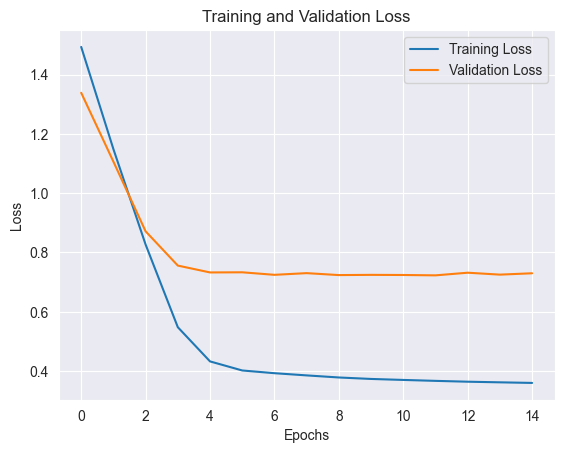

In [250]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show() 

In [251]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Define the function to create the model
def create_model(hidden_units=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation, input_dim=X_train_scaled.shape[1]))
    model.add(Dense(hidden_units, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [239]:
# Create the KerasClassifier wrapper
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

In [240]:
# Define the hyperparameters to tune
param_grid = {
    'hidden_units': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop']
}

In [241]:
# Perform grid search with cross-validation
from sklearn.model_selection import GridSearchCV
from keras import optimizers
from keras.layers import Dropout
from keras import regularizers
# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000272803237D0>,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_units': [32, 64, 128],
                         'optimizer': ['adam', 'rmsprop']})

In [242]:
# Get the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [243]:
# Evaluate the best model on the testing data
test_accuracy = grid_search.score(X_test_scaled, y_test)
print('Model Evaluation Results:')
print(f'Test Accuracy: {test_accuracy:.4f}')


Model Evaluation Results:
Test Accuracy: 0.8400


In [244]:
# Print the best parameters
print('Best Hyperparameters:')
print(best_params)

Best Hyperparameters:
{'activation': 'relu', 'hidden_units': 64, 'optimizer': 'adam'}


In [245]:
# Perform preprocessing: scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
scaler = MinMaxScaler()
X_preprocessed = scaler.fit_transform(X)

# Split the preprocessed dataset into training, validation, and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(X_preprocessed,y,test_size=0.2, random_state=42)
val_data, test_data, val_labels, test_labels = train_test_split(test_data, test_labels,test_size=0.5, random_state=42)


# FNN

In [258]:
# Create the FNN model
fnn = keras.Sequential()

# Add the input layer and the first hidden layer
fnn.add(Dense(units=64, activation='relu', input_dim=9))

# Add more hidden layers
fnn.add(Dense(units=32, activation='relu'))
fnn.add(Dense(units=16, activation='relu'))

# Add the output layer
fnn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
fnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
fnn.summary()


Model: "sequential_163"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_490 (Dense)           (None, 64)                640       
                                                                 
 dense_491 (Dense)           (None, 32)                2080      
                                                                 
 dense_492 (Dense)           (None, 16)                528       
                                                                 
 dense_493 (Dense)           (None, 1)                 17        
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [259]:
# Train the model
fnn.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on test data (assuming you have test data stored in variables X_test and y_test)
loss, accuracy = model.evaluate(X_test, y_test)

# Print the evaluation results
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/10
19/19 [==============================] - 1s 4ms/step - loss: 0.6478 - accuracy: 0.7785
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.9161
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.9161
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.9144
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.9111
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.9060
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.9077
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.9060
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.9027
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.8400
Loss: 0.6920875310897

In [260]:
import joblib
joblib.dump(fnn,'CC.pkl')

['CC.pkl']